# link to data page : https://data.gov.my/data-catalogue/births_annual_sex_ethnic?sex=both&ethnicity=overall&visual=table

In [2]:
# If not already installed, do: pip install pandas fastparquet
import pandas as pd
import matplotlib.pyplot as plt

URL_DATA = 'https://storage.dosm.gov.my/demography/birth_sex_ethnic.parquet'

df = pd.read_parquet(URL_DATA)
if 'date' in df.columns: df['date'] = pd.to_datetime(df['date'])

print(df)

          date     sex         ethnicity       abs  rate
0   2000-01-01    both           overall  537853.0  22.9
1   2001-01-01    both           overall  505479.0  21.0
2   2002-01-01    both           overall  494538.0  20.2
3   2003-01-01    both           overall  481399.0  19.2
4   2004-01-01    both           overall  481800.0  18.9
..         ...     ...               ...       ...   ...
499 2020-01-01  female  other_noncitizen    8726.0  10.7
500 2021-01-01  female  other_noncitizen    7311.0   9.4
501 2022-01-01  female  other_noncitizen    7612.0  10.0
502 2023-01-01    male  other_noncitizen       NaN   NaN
503 2023-01-01  female  other_noncitizen       NaN   NaN

[504 rows x 5 columns]


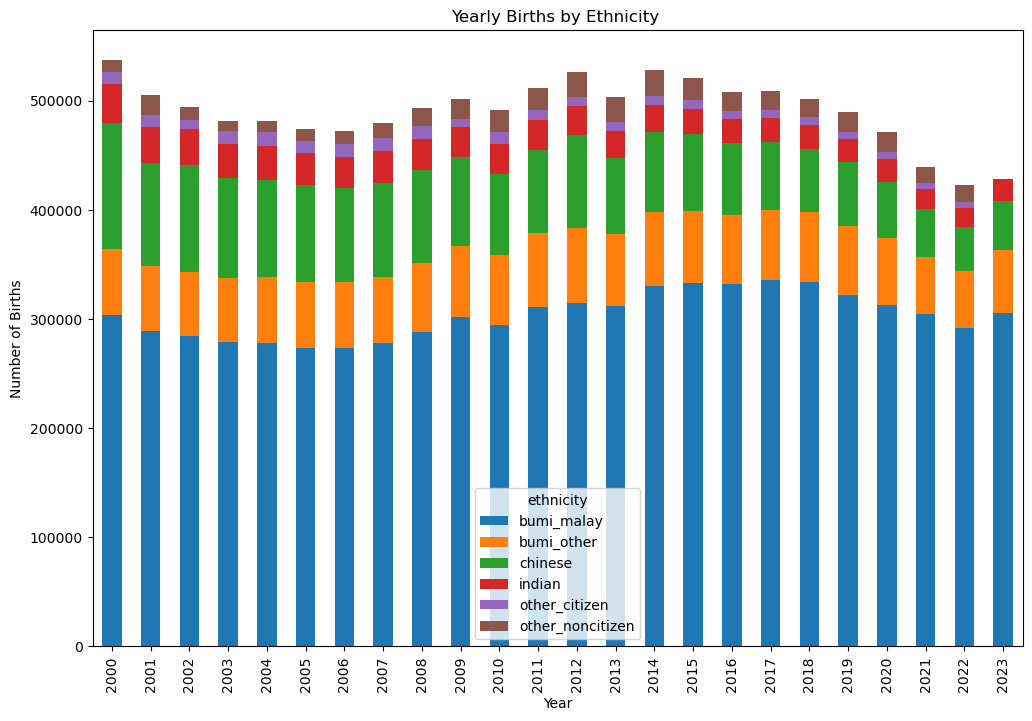

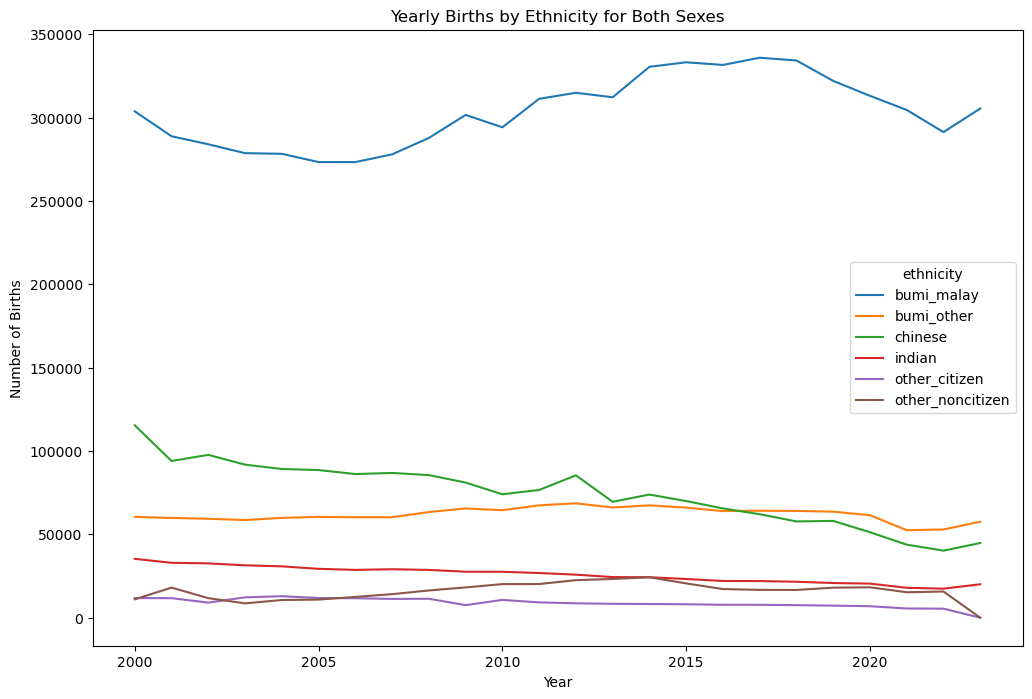

In [5]:

# Filter the DataFrame for sex='both' and ethnicity not equal to 'overall'
filtered_df = df[(df['sex'] == 'both') & (df['ethnicity'] != 'overall')]

# Pivot the DataFrame to have years as index, ethnicities as columns, and 'abs' as values
pivot_df = filtered_df.pivot_table(index=filtered_df['date'].dt.year, columns='ethnicity', values='abs', aggfunc='sum')

# Plot the stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8))

# Set plot title and labels for the bar chart
plt.title('Yearly Births by Ethnicity ')
plt.xlabel('Year')
plt.ylabel('Number of Births')

# Show the bar chart
plt.show()

# Plot the line graph
pivot_df.plot(kind='line', figsize=(12, 8))

# Set plot title and labels for the line graph
plt.title('Yearly Births by Ethnicity for Both Sexes')
plt.xlabel('Year')
plt.ylabel('Number of Births')

# Show the line graph
plt.show()




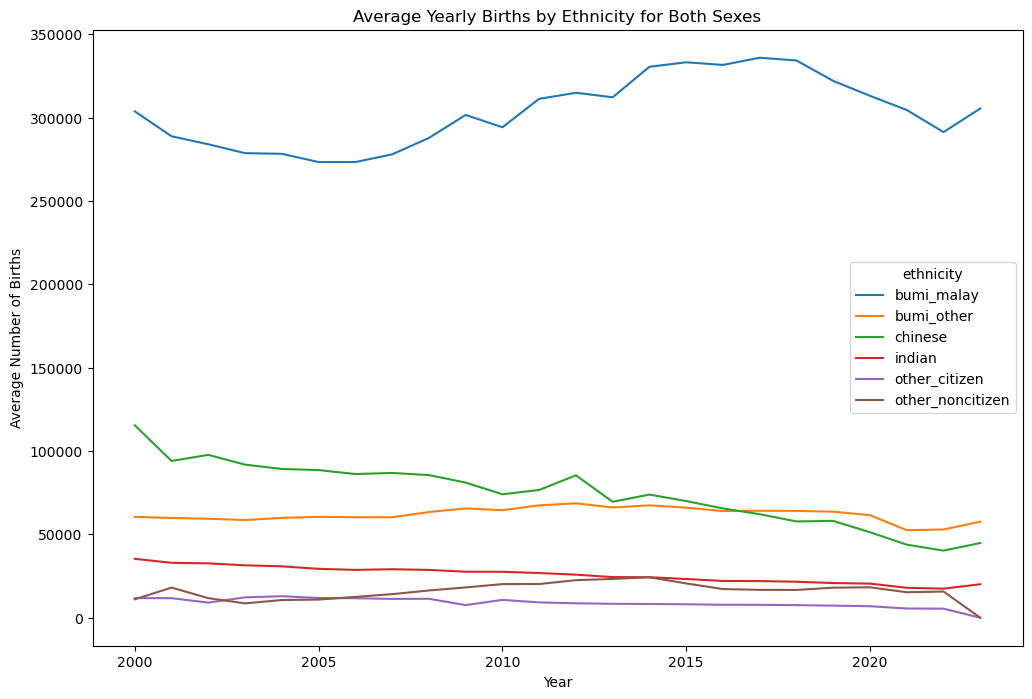

ethnicity  bumi_malay  bumi_other   chinese   indian  other_citizen  \
date                                                                  
2000         303782.0     60498.0  115429.0  35329.0        11774.0   
2001         288828.0     59867.0   94035.0  32947.0        11731.0   
2002         284038.0     59373.0   97712.0  32610.0         9064.0   
2003         278699.0     58596.0   91828.0  31444.0        12228.0   
2004         278311.0     59916.0   89239.0  30820.0        12899.0   
2005         273364.0     60498.0   88577.0  29326.0        11831.0   
2006         273358.0     60267.0   86195.0  28695.0        11691.0   
2007         277993.0     60287.0   86853.0  29086.0        11291.0   
2008         287827.0     63395.0   85567.0  28683.0        11377.0   
2009         301649.0     65581.0   81079.0  27600.0         7555.0   
2010         294234.0     64510.0   74068.0  27556.0        10708.0   
2011         311305.0     67429.0   76642.0  26823.0         9188.0   
2012  

In [4]:


# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter the DataFrame for sex='both' and ethnicity not equal to 'overall'
filtered_df = df[(df['sex'] == 'both') & (df['ethnicity'] != 'overall')]

# Pivot the DataFrame to have years as index, ethnicities as columns, and 'abs' as values
pivot_df = filtered_df.pivot_table(index=filtered_df['date'].dt.year, columns='ethnicity', values='abs', aggfunc='mean')

# Plot the line graph for average births by year by ethnicity
pivot_df.plot(kind='line', figsize=(12, 8))

# Set plot title and labels for the line graph
plt.title('Average Yearly Births by Ethnicity for Both Sexes')
plt.xlabel('Year')
plt.ylabel('Average Number of Births')

# Show the line graph
plt.show()

# Print the pivot table with average births by year by ethnicity
print(pivot_df)
